# Diabetes Analysis 

## Problem Statement

In Aoteroa, It is estimated that about 307,000 people had diabetes in 2022, an increase of around 15,000 people from 2021. 

With such diseases, early detection and timely intervention are crucial to reduce their impact on the concerned individuals. 

This projects aims to answer the following questions:
- Can a machine learning model accurately predict the likelihood of diabetes?
- Which health indicators contribute the most to predicting diabetes risk?
- How can this model be used to aid health-care professionals in decision making?

## The expected outcomes:
- Explanatory data analysis and deep dive into the dataset.
- A machine learning model to predict the likelihood of diabetes with high accuracy, providing probabilites and binary classifications.
- Evaluation of the performance of this model.

### Explanatory Data Analysis

Firstly, let's import the dataset into the Jupyter environment

In [44]:
%pip install pandas
%pip install seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as


Now, let's import all the packages we will need to have in this project

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV



In [35]:
file_path = r"C:\Users\seiff\Desktop\Diabetes Analaysis\diabetes_dataset.csv"
df = pd.read_csv(file_path)
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Our data is looking good so far, let's look at some summary statistics to see if we can find anything interesting

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some intersting things appeared here: It's quite physically impossible to have someone with zero Glucose, BloodPressure, SkinThickness, Insulin and BMI.To handle these missing values, I will be replacing them with the median of each column.

In [38]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

df[columns_with_zeros] = df[columns_with_zeros].fillna(df[columns_with_zeros].median())



<Axes: >

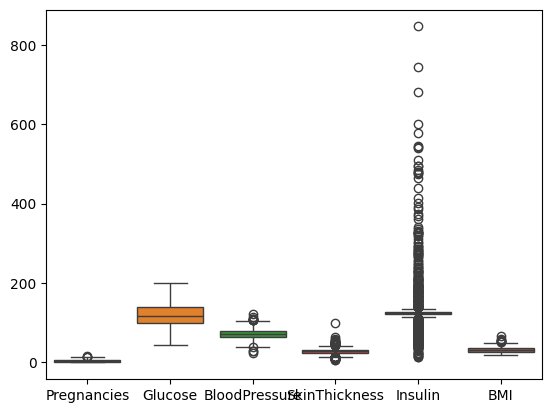

In [39]:
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])


From the box plot, we can see that there seems to be a wider spread for the levels of insulin while the number of pregnancies seem to have a significantly lower spread. 

The wider spread of insulin levels indicates that insulin levels vary significantly across the patients. This could suggest a wide range of insulin responses, possibly due to varying stages of diabetes or other factors like obesity, which is common in diabetes-related studies.

The lower spread for pregnancies implies that the number of pregnancies is fairly uniform across the dataset, with few patients having very high or very low pregnancy counts. This could indicate that the number of pregnancies isn't as strongly correlated with diabetes risk compared to other features like glucose or BMI.

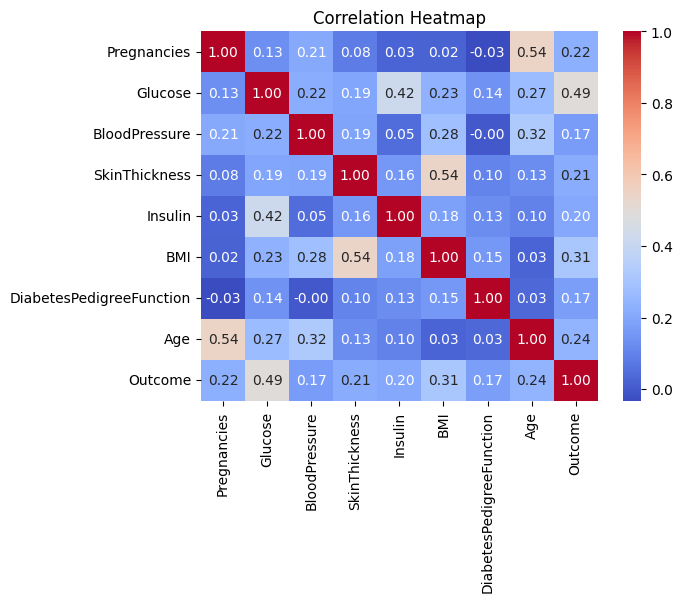

In [40]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


This correlation heatmap tells us that there is a high correlation between the glucose levels of a patient and the outcome of their diabetes.

The strong correlation between glucose levels and the diabetes outcome reinforces the importance of glucose regulation in predicting diabetes. In clinical practice, glucose levels, especially after an oral glucose tolerance test (OGTT), are known to be a key diagnostic tool for diagnosing diabetes.

This is also followed by correlation of 0.31 with BMI (Body Mass Index) which suggests that while BMI is an important factor, it is not as strongly linked to the presence of diabetes as glucose levels. There is also a correlation of 0.24 with age, suggesting that older individuals have a higher likelihood of diabetes. However, this correlation is still moderate and points to other factors at play.

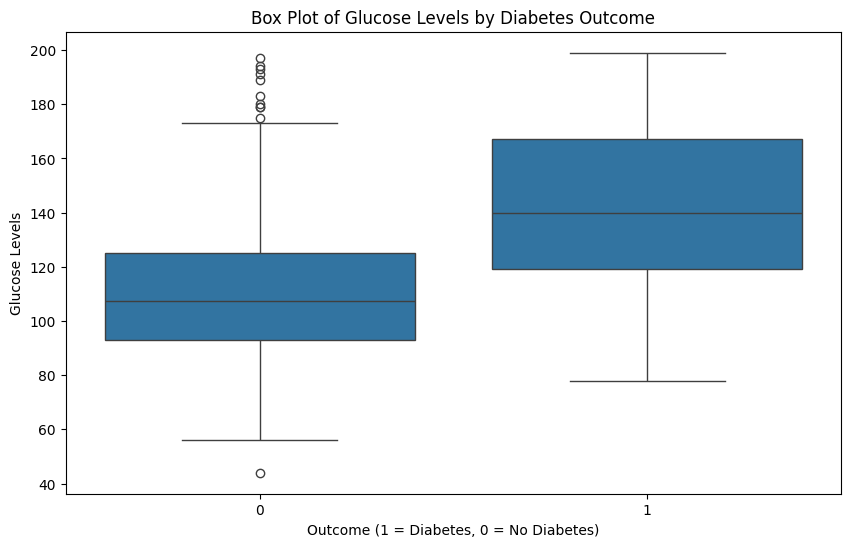

In [51]:
# Box plot: Glucose levels by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot of Glucose Levels by Diabetes Outcome')
plt.xlabel('Outcome (1 = Diabetes, 0 = No Diabetes)')
plt.ylabel('Glucose Levels')
plt.show()


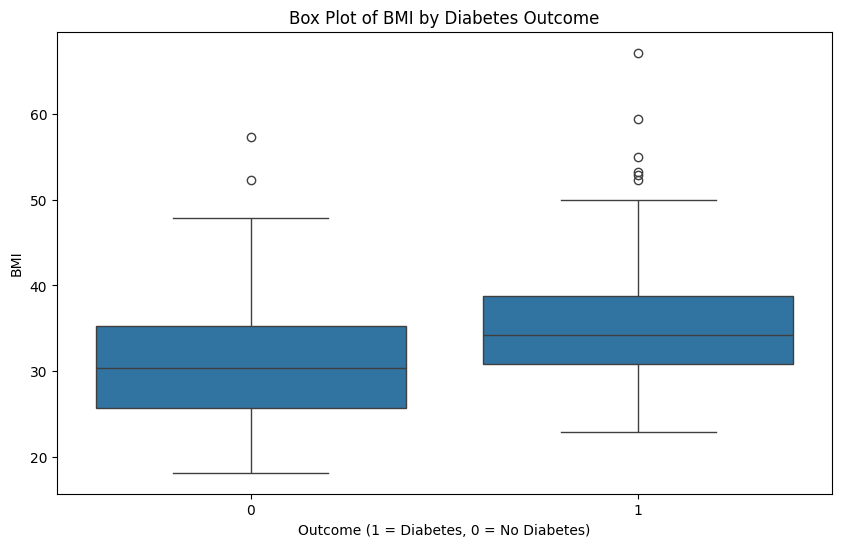

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('Box Plot of BMI by Diabetes Outcome')
plt.xlabel('Outcome (1 = Diabetes, 0 = No Diabetes)')
plt.ylabel('BMI')
plt.show()

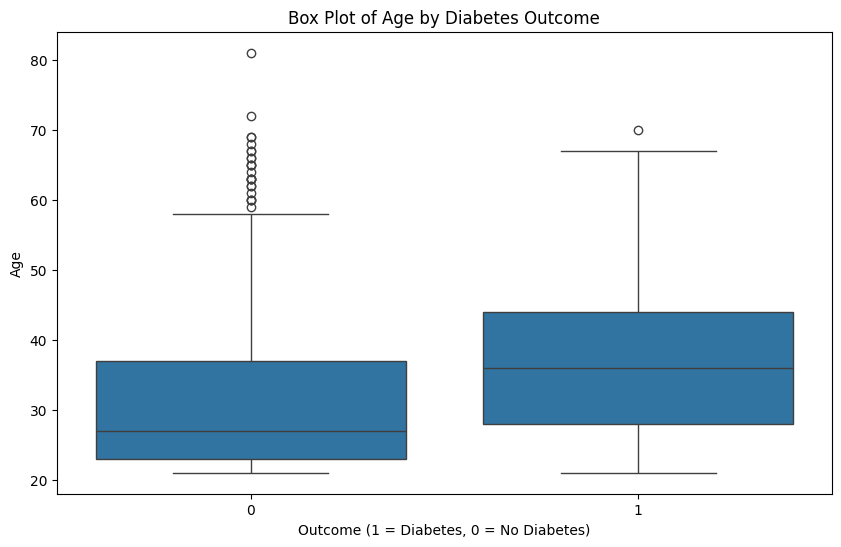

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Box Plot of Age by Diabetes Outcome')
plt.xlabel('Outcome (1 = Diabetes, 0 = No Diabetes)')
plt.ylabel('Age')
plt.show()

From the box plots, we observe that glucose levels, BMI (Body Mass Index), and age are consistently higher, on average, in patients with diabetes compared to those without diabetes. This pattern strongly indicates a potential relationship between these features and the likelihood of developing diabetes.

The box plot clearly highlights a significant elevation in glucose levels among diabetic patients. Combined with the high correlation coefficient (~0.49), this confirms that glucose is a critical feature in predicting diabetes. This aligns with established clinical insights, as glucose regulation is a primary factor in diagnosing and managing diabetes.

Patients with higher BMI values show a noticeable association with diabetes. While the correlation coefficient is moderate (~0.31), the box plot shows a higher median BMI for diabetic patients, suggesting its relevance in contributing to the prediction model.

The box plot reveals that diabetic patients tend to be older on average compared to non-diabetic patients. Although the correlation coefficient (~0.24) is lower than glucose and BMI, age is still a meaningful factor. It plays a crucial role, particularly in identifying risks associated with type 2 diabetes, which tends to develop later in life.

*These findings, supported by both the box plot analysis and the correlation coefficients, provide a strong basis for focusing on glucose levels, BMI, and age as key dimensions in developing the machine learning model. The relationship between these features and the likelihood of diabetes is well-established, both statistically and clinically, making them essential predictors for a robust model. By emphasizing these dimensions, we ensure that the model leverages the most influential factors, maximizing its predictive accuracy and clinical relevance.*

### Training a machine learning model with the three predominant features

To train the machine learning model I will create two dataframes:
- X: This will contain the features without the outcome column
- Y: This will contain the outcome column only, which is our target column

Then I will split my dataset into 80% for training, 20% for testing.


In [58]:
# Assuming your DataFrame is named df and 'Outcome' is the target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable (Outcome)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Trees and why I chose them
A decision tree is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the dataset into smaller subsets based on decision rules derived from the features. 

The random_state ensures that the results are following a specific pattern to create the results, ensuring that their is some consistency in training the data

In [59]:
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)
  # Scale features


DecisionTreeClassifier(random_state=42)

Once the model is trained on the training data, it's time to fit it on the test data using the .predict() method and store these predictionsin the y_predict. Later, we will compare it with the actual results of the test data.

In [60]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)




--- Model Accuracy ---
Accuracy: 72.08%

--- Classification Report ---
              precision    recall  f1-score   support

 No Diabetes       0.79      0.77      0.78        99
    Diabetes       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

--- Confusion Matrix ---
             Predicted No Diabetes  Predicted Diabetes
No Diabetes                     76                  23
Diabetes                        20                  35


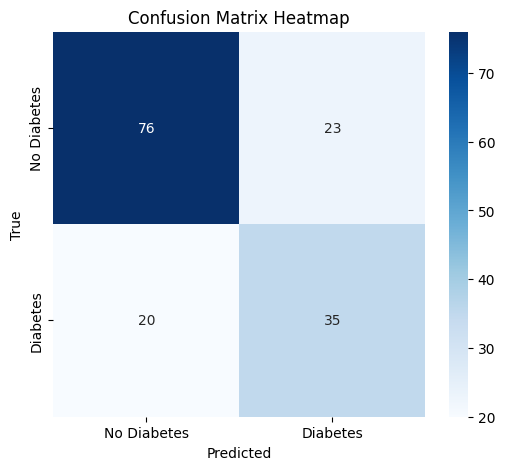

In [73]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Accuracy ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("--- Classification Report ---")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["No Diabetes", "Diabetes"], columns=["Predicted No Diabetes", "Predicted Diabetes"])

print("--- Confusion Matrix ---")
print(conf_matrix_df)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The overall accuracy of 72.08% indicates that the model correctly classified approximately 72% of the test cases. While this is a decent performance, there is room for improvement, particularly in detecting cases of diabetes.

No Diabetes: With a precision of 0.79 and recall of 0.77, the model effectively identifies individuals without diabetes, as most of its predictions are correct.

Diabetes: The precision of 0.60 indicates that 60% of the predicted diabetes cases are correct, while the recall of 0.64 shows the model captures 64% of actual diabetes cases. This suggests the model is less reliable in predicting diabetes than no diabetes.

F1-Score: Balancing precision and recall, the F1-score for "Diabetes" (0.62) is lower than for "No Diabetes" (0.78), reflecting the challenges in identifying positive diabetes cases.
Confusion Matrix:

True Positives (35): The model correctly identified 35 diabetes cases.

True Negatives (76): It correctly predicted 76 individuals as not having diabetes.

False Positives (23): These are cases where the model incorrectly predicted diabetes when the person does not have it.

False Negatives (20): These are missed diabetes cases, where the model incorrectly predicted no diabetes.

To improve the model’s performance beyond the current 72% accuracy, several approaches can be explored. 

First, feature engineering can be used to identify and create more informative features, such as adding interaction terms or transforming existing variables. This could include combining glucose levels with BMI or age to capture more meaningful patterns. 

Additionally, tuning hyperparameters through grid search or randomized search could further refine the model.

Finally, incorporating more data, if available, would likely help the model generalise better. Testing and optimizing based on additional metrics such as precision, recall, and F1-score will also help identify where the model is underperforming and allow for targeted improvements.

